In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
def latin_hypercube_2d_uniform(n): # where n = sample size
    lower_limits=np.arange(0,n)/n
    upper_limits=np.arange(1,n+1)/n

    points=np.random.uniform(low=lower_limits,high=upper_limits,size=[2,n]).T
    np.random.shuffle(points[:,1])
    return points

<function matplotlib.pyplot.show(close=None, block=None)>

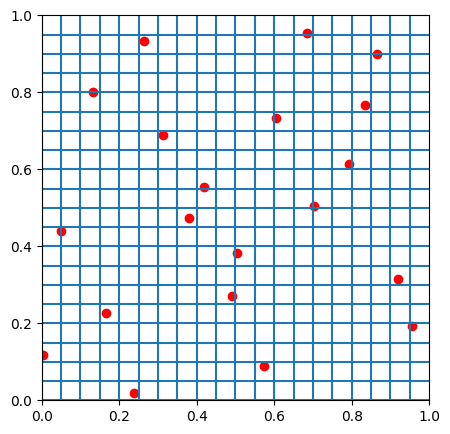

In [4]:
n=20
p=latin_hypercube_2d_uniform(n)
plt.figure(figsize=[5,5])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0],p[:,1],c='r')

for i in np.arange(0,1,1/n):
    plt.axvline(i)
    plt.axhline(i)
plt.show

In [11]:
# 28 parameters
# 7 factors
def latin_hypercube(n, D, random_seed):
    if random_seed is not None:
        np.random.seed(random_seed)
    cut = np.linspace(0, 1, n + 1)
    u = np.random.rand(n, D)  # random points inside each stratum
    samples = np.zeros_like(u)

    for j in range(D):
        # permute strata for each dimension independently
        perm = np.random.permutation(n)
        samples[:, j] = cut[:-1] + u[perm, j] * (1.0 / n)

    return samples

In [12]:
# 27 parameters, 100 samples
samples = latin_hypercube(n=100, D=27, random_seed=42)
print(samples.shape)
print(samples[:3])

(100, 27)
[[0.00753428 0.00997934 0.00860122 0.00900418 0.00597413 0.00026511
  0.00355493 0.00886604 0.00066444 0.00057087 0.00556763 0.0041413
  0.00254392 0.00384207 0.00452199 0.00386735 0.00043739 0.00812901
  0.00023352 0.00081759 0.00305604 0.00100637 0.0008163  0.00934367
  0.00679647 0.0062586  0.00440763]
 [0.01465206 0.01134415 0.01743508 0.01161221 0.01217893 0.01640826
  0.01507468 0.01887213 0.01293489 0.01770912 0.01142137 0.01546648
  0.01872124 0.01882416 0.01250967 0.01522733 0.01101782 0.01524756
  0.01431945 0.01815461 0.01131489 0.01165955 0.01900083 0.01303946
  0.01971058 0.01450351 0.01474214]
 [0.02862043 0.02637201 0.02412622 0.02841448 0.02391082 0.02082172
  0.02591275 0.02133828 0.02977174 0.02207886 0.02417767 0.02684233
  0.0280744  0.02295041 0.02927178 0.02791579 0.02803026 0.02269243
  0.02018391 0.02927001 0.0261062  0.02303275 0.02132716 0.02841829
  0.02505252 0.02938305 0.02201627]]
